<a href="https://colab.research.google.com/github/OmarIsmailAbdelrahman/Hotel-Rating/blob/main/HotelRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Rating Prediction**

# Library importing and Reading Data and Information about the Data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import math

In [ ]:
import os
x = os.getcwd()
df = pd.read_csv(x +"/drive/MyDrive/Datasets/hotel-regression-dataset.csv")

In [ ]:
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng,Reviewer_Score
0,44 Grosvenor Square Westminster Borough London...,806,5/19/2017,7.8,Millennium Hotel London Mayfair,Qatar,Carpets and HVAC are dusty,6,3117,Very good location,4,9,"[' Leisure trip ', ' Family with young childre...",76 days,51.510574,-0.150995,6.7
1,Bryanston Street Marble Arch Westminster Borou...,908,3/29/2016,8.5,Amba Hotel Marble Arch,United Kingdom,Nothing,2,3980,Service and the room,5,1,"[' Leisure trip ', ' Group ', ' Standard Twin ...",492 day,51.514400,-0.156551,10.0
2,Via Senigallia 6 20161 Milan Italy,904,8/23/2016,8.1,Hotel Da Vinci,Belgium,City tax should be considered while booking b...,14,16670,Breakfast is quite rich it is not easy to fin...,19,23,"[' Leisure trip ', ' Couple ', ' Double Room '...",345 day,45.533137,9.171102,7.1


In [ ]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags',
       'days_since_review', 'lat', 'lng', 'Reviewer_Score'],
      dtype='object')

In [ ]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,Reviewer_Score
count,290315.000000,290315.00000,290315.000000,290315.000000,290315.000000,290315.000000,288491.000000,288491.000000,290315.000000
mean,496.481987,8.39744,18.531943,2739.497680,17.814126,7.174979,49.436561,2.834710,8.396622
std,499.005247,0.54809,29.662069,2315.945964,21.780053,11.054209,3.468708,4.592047,1.636642
min,1.000000,5.20000,0.000000,43.000000,0.000000,1.000000,41.328376,-0.369758,2.500000
25%,168.000000,8.10000,2.000000,1158.000000,5.000000,1.000000,48.214277,-0.143372,7.500000
50%,341.000000,8.40000,9.000000,2130.000000,11.000000,3.000000,51.499981,0.019886,8.800000
75%,641.000000,8.80000,23.000000,3613.000000,22.000000,8.000000,51.516288,4.834443,9.600000
max,2682.000000,9.80000,403.000000,16670.000000,395.000000,315.000000,52.400181,16.429233,10.000000


In [ ]:
df.corr()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,Reviewer_Score
Additional_Number_of_Scoring,1.000000,-0.151756,0.026385,0.823891,-0.052971,-0.072197,0.336374,-0.295632,-0.060194
Average_Score,-0.151756,1.000000,-0.110640,-0.178563,0.105956,0.038607,-0.109353,0.106133,0.362950
Review_Total_Negative_Word_Counts,0.026385,-0.110640,1.000000,0.033291,0.119366,0.002694,0.018650,-0.017574,-0.381632
Total_Number_of_Reviews,0.823891,-0.178563,0.033291,1.000000,-0.030868,-0.025222,0.099382,-0.013444,-0.072346
Review_Total_Positive_Word_Counts,-0.052971,0.105956,0.119366,-0.030868,1.000000,0.027075,-0.037848,0.034719,0.221874
Total_Number_of_Reviews_Reviewer_Has_Given,-0.072197,0.038607,0.002694,-0.025222,0.027075,1.000000,-0.061963,0.111664,0.003444
lat,0.336374,-0.109353,0.018650,0.099382,-0.037848,-0.061963,1.000000,-0.303859,-0.035747
lng,-0.295632,0.106133,-0.017574,-0.013444,0.034719,0.111664,-0.303859,1.000000,0.032758
Reviewer_Score,-0.060194,0.362950,-0.381632,-0.072346,0.221874,0.003444,-0.035747,0.032758,1.000000


# Extract features from Tags 
  Tag is List contain the type of trip, the number
  

Convert it from String to Array

In [ ]:
import ast

def convert_to_array(x):
    return ast.literal_eval(x)

# apply the function to the column containing the arrays
df['Tags'] = df['Tags'].apply(convert_to_array)

Create Trip Type column

In [ ]:
Leisure = df["Tags"].apply(lambda x: " Leisure trip " in x)
Business = df["Tags"].apply(lambda x: " Business trip " in x)

df.loc[Leisure, 'trip_type'] = 0
df.loc[Business, 'trip_type'] = 1


In [ ]:
#290314 business >= 243727  leisure & business => 8449
df["trip_type"].isnull().sum()

8449

Number of unique values in this array

In [ ]:
df_exploded = df.explode('Tags')

unique_values = df_exploded['Tags'].unique()
unique_values[70:110]

# " Group ", " Couple ", " Family with older children ", " Solo traveler ", " Travelers with friends "

# Small,Classic ,Standard ,Suite ,Superior ,,,,

#Double or Twin, triple

# Bungalow,Villa,Penthouse,Superior ,Family ,Connecting ,Executive ,Suite,Deluxe ,Standard,Premier 

array([' Junior Suite ', ' Classic Double Room with Courtyard View ',
       ' Deluxe Double or Twin Room with Sea View ',
       ' Superior Double Room with Balcony and City View ',
       ' City King Room ', ' Double Guest Room ', ' Superior ',
       ' Superior Suite ', ' Double Room Curieuse ',
       ' Studio Double Room ', ' Deluxe room with 1 queen bed ',
       ' Superior Room with Queen Bed ', ' Comfort Triple Room ',
       ' Superior Double or Twin Room ',
       ' Superior Room with Spa Access Free Wifi ',
       ' Superior Room with 1 Queensize Bed and Double Sofa bed ',
       ' Double Room with Two Double Beds ', ' Single Room with Shower ',
       ' Superior Room Swimming Pool Hammam Access upon reservation ',
       ' Studio Triple ', ' Luxury Double Room ',
       ' Double or Twin Room 1 2 Adults ', ' King Room ',
       ' Classic King Room ', ' Double Room 1 Adult ',
       ' Comfort Double Room ', ' Queen Room Mobility Access ',
       ' Standard Room with 1 Double 

Create Nights column for the number of nights each guest have

In [ ]:
import re
def extract_Nights(arr):
    word = r'Stayed (\d+) night(?:s)?'                      # define the String that we want to Extract
    for val in arr:                                         # becasue it's an array and the index is unknown you check every element in it
        if isinstance(val, str) and re.search(word, val):   # the isinstance check if string, and re.search find patterns between two strings
            stay = int(re.search(word, val).group(1))       # Extect the number from the word, and the augment 1 is to return the first match
            return stay
    return None


df['duration'] = df['Tags'].apply(extract_Nights)


In [ ]:
df["duration"].isnull().sum()

109

Creates Room type

In [ ]:
room_type =  ['Cosy' , 'Luxury',"Apartment",'Classic','Bungalow', 'Villa', 'Penthouse', 'Superior', 'Studio', 'Connecting', 'Suite', 'Deluxe', 'Standard','Executive',"Economy",'Family Room',"Club","City","Guest"]
def extract_Room(arr):
    for val in arr:
        for word in room_type:
            if word in val:
                return word
    return "Unknown"            # i used other as there is a lot of data that doesn't say the type of room, and there is a lot of types too

df["room_type"] = df['Tags'].apply(extract_Room)




(array([ 4864., 48996., 92270., 48521.,   936.,  9946.,     0., 20271.,
        35966.,  8066.,  1949.,  8434.,  3327.,     0.,  1584.,  2460.,
         1015.,  1262.,   299.,   149.]),
 array([ 0.  ,  0.85,  1.7 ,  2.55,  3.4 ,  4.25,  5.1 ,  5.95,  6.8 ,
         7.65,  8.5 ,  9.35, 10.2 , 11.05, 11.9 , 12.75, 13.6 , 14.45,
        15.3 , 16.15, 17.  ]),
 <BarContainer object of 20 artists>)

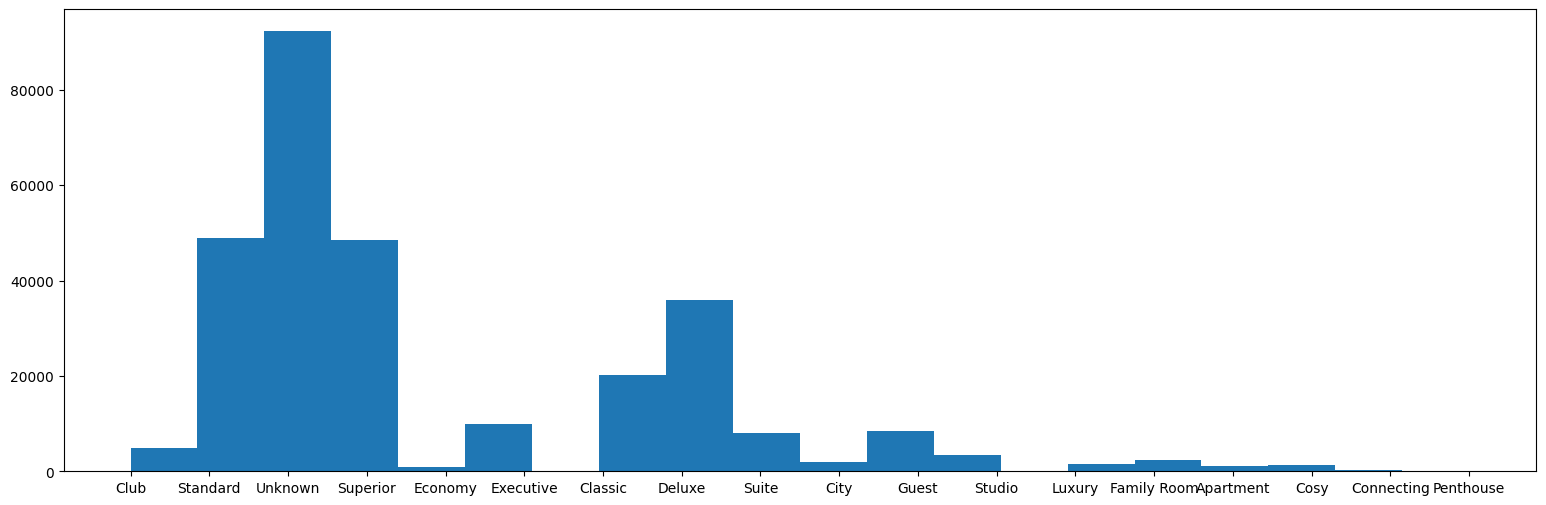

In [ ]:
plt.figure(figsize=(19, 6))

plt.hist(df["room_type"],bins = 20,)

Create Bed Type

In [ ]:
room_size = ['Double','Twin','Single',"Triple","Quadruple","King","Queen",'queen']
def extract_Room(arr):
    for val in arr:
        for word in room_size:
            if word in val:
                return word
    return "Unknown"        # same as room type

df["bed_type"] = df['Tags'].apply(extract_Room)

(array([170818.,      0.,  26641.,      0.,      0.,  38537.,      0.,
             0.,  16185.,      0.,      0.,  14159.,      0.,      0.,
          5345.,      0.,      0.,  17618.,      0.,   1012.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

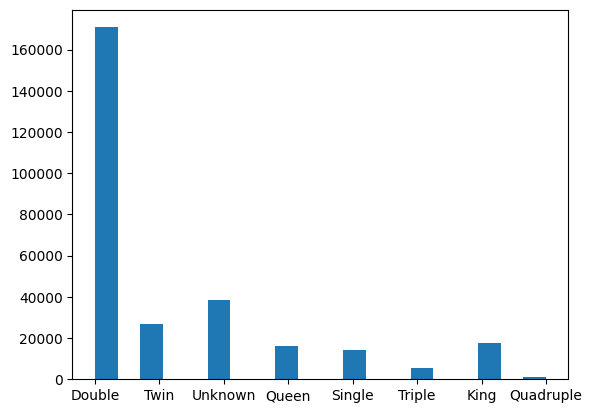

In [ ]:
# df.loc[((df["bed_type"] == "Double") | (df["bed_type"] == "Twin")),"bed_type"] = "Double or Twin"           # There is a difference between the two 
df.loc[((df["bed_type"] == "Queen") | (df["bed_type"] == "queen")),"bed_type"] = "Queen"           
plt.hist(df["bed_type"],align='mid',bins = 20)

Create number of customers

In [ ]:
room_size = ['Family with','Couple','Solo traveler','Group','Travelers with friends']
def extract_customer(arr):
    for val in arr:
        for word in room_size:
            if word in val:
                return val
    return None

df["customer_type"] = df['Tags'].apply(extract_customer)
df["customer_type"].isnull().sum()

0

In [ ]:
# df[["Tags","customer_type"]].head(1000)

# df[df["customer_type"].isnull()][["Tags","customer_type"]].head(100)


(array([ 34256.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,  36725.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0., 142114.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  14989.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  61020.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
          1211.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

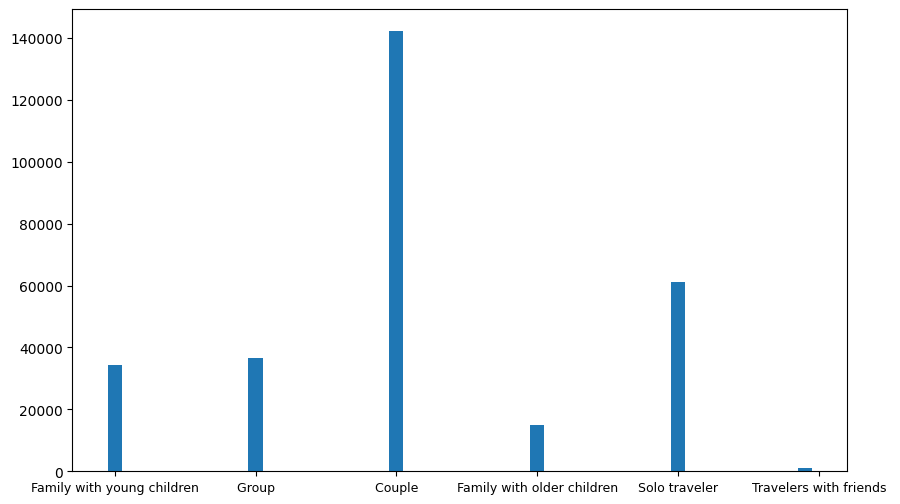

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=9)
plt.hist(df["customer_type"],bins = 50,align='left')

Create submit Column

In [ ]:
device_type = ['Submitted']
def extract_submit(arr):
    for val in arr:
        for word in device_type:
            if word in val:
                return 1
    return 0  # I found only submitted by phone in this dataset, so binary is solution

df["submit"] = df['Tags'].apply(extract_submit)
df["submit"].isnull().sum()

0

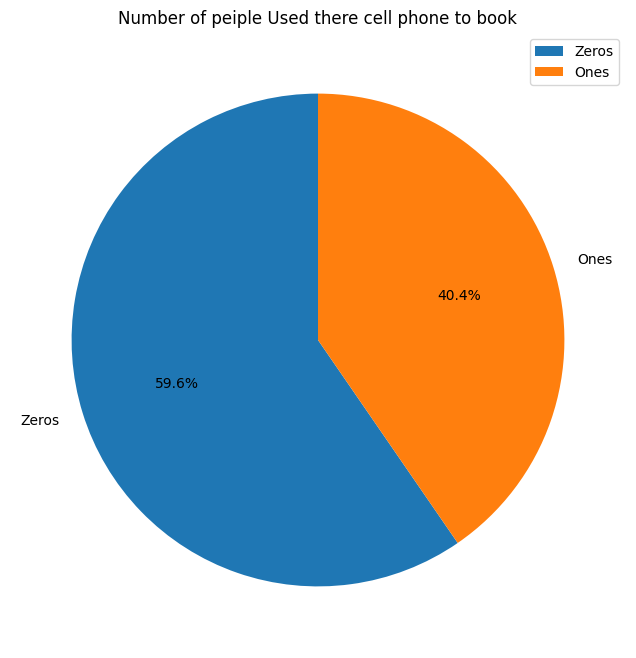

In [ ]:
df['submit'].value_counts()
labels = ['Zeros', 'Ones']

counts = df['submit'].value_counts()

# create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# add a title
ax.set_title('Number of peiple Used there cell phone to book')

# add a legend
ax.legend()


In [ ]:
df.drop("Tags",axis =1 ,inplace = True)

# Hotel Address 
Transform Column to Country and City

In [ ]:
# Pick only the Country that contain the Address
df['Hotel_Address'] = df['Hotel_Address'].str.rsplit(n=2).str[-2:].str.join(' ')


In [ ]:
print(df['Hotel_Address'].head(20))

0            United Kingdom
1            United Kingdom
2               Milan Italy
3              Paris France
4            United Kingdom
5           Barcelona Spain
6            United Kingdom
7     Amsterdam Netherlands
8            United Kingdom
9               Milan Italy
10           United Kingdom
11    Amsterdam Netherlands
12           United Kingdom
13           United Kingdom
14          Barcelona Spain
15           Vienna Austria
16           United Kingdom
17           United Kingdom
18          Barcelona Spain
19           United Kingdom
Name: Hotel_Address, dtype: object


In [ ]:
df.head()
# df["Additional_Number_of_Scoring"].describe()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,days_since_review,lat,lng,Reviewer_Score,trip_type,duration,room_type,bed_type,customer_type,submit
0,United Kingdom,806,5/19/2017,7.8,Millennium Hotel London Mayfair,Qatar,Carpets and HVAC are dusty,6,3117,Very good location,...,76 days,51.510574,-0.150995,6.7,0.0,6.0,Club,Double,Family with young children,1
1,United Kingdom,908,3/29/2016,8.5,Amba Hotel Marble Arch,United Kingdom,Nothing,2,3980,Service and the room,...,492 day,51.514400,-0.156551,10.0,0.0,3.0,Standard,Twin,Group,1
2,Milan Italy,904,8/23/2016,8.1,Hotel Da Vinci,Belgium,City tax should be considered while booking b...,14,16670,Breakfast is quite rich it is not easy to fin...,...,345 day,45.533137,9.171102,7.1,0.0,1.0,Unknown,Double,Couple,0
3,Paris France,230,7/14/2016,8.6,H tel Bedford,United Kingdom,Nothing,2,1703,Everything,...,385 day,48.872059,2.323680,10.0,0.0,1.0,Unknown,Double,Family with older children,1
4,United Kingdom,241,5/22/2017,7.5,Holiday Inn London Oxford Circus,Israel,At first we got a very small room in the end ...,58,1287,The staff was helpful changing our room Centr...,...,73 days,51.516843,-0.149557,5.8,0.0,4.0,Unknown,Double,Couple,0


In [ ]:
x = df[df["Hotel_Name"] == 1]["Additional_Number_of_Scoring"]

In [ ]:
x.unique()

array([], dtype=int64)

# Null Values
  lat and lng Columns have 1824 each, We can either drop the columns or fill it, because the number of null columns is less than 1%.

#  Filling
  There is 3 techniques to fill them: 



1.   Mean, Median, Mode:



*   Mean is used if the data is normally distributed
*   Median is used with skew data as it is less affected by outliers than mean 
*   Mode is used if your data is categorical

2.   KNN:



*   KNN model to predict the missing data based on the values of neighboring data points

*   it works both in numerical and categorical data

*   Require Choosing the K hyperparameter carefully as high value require more computation but robust, and lower value is less robust


3.    MICE imputation:



*   Is a technique for imputing missing data using a multivariate regression model.

*   can handle both numerical and categorical data.

*   can also preserve the distributional properties of the data.




<Axes: >

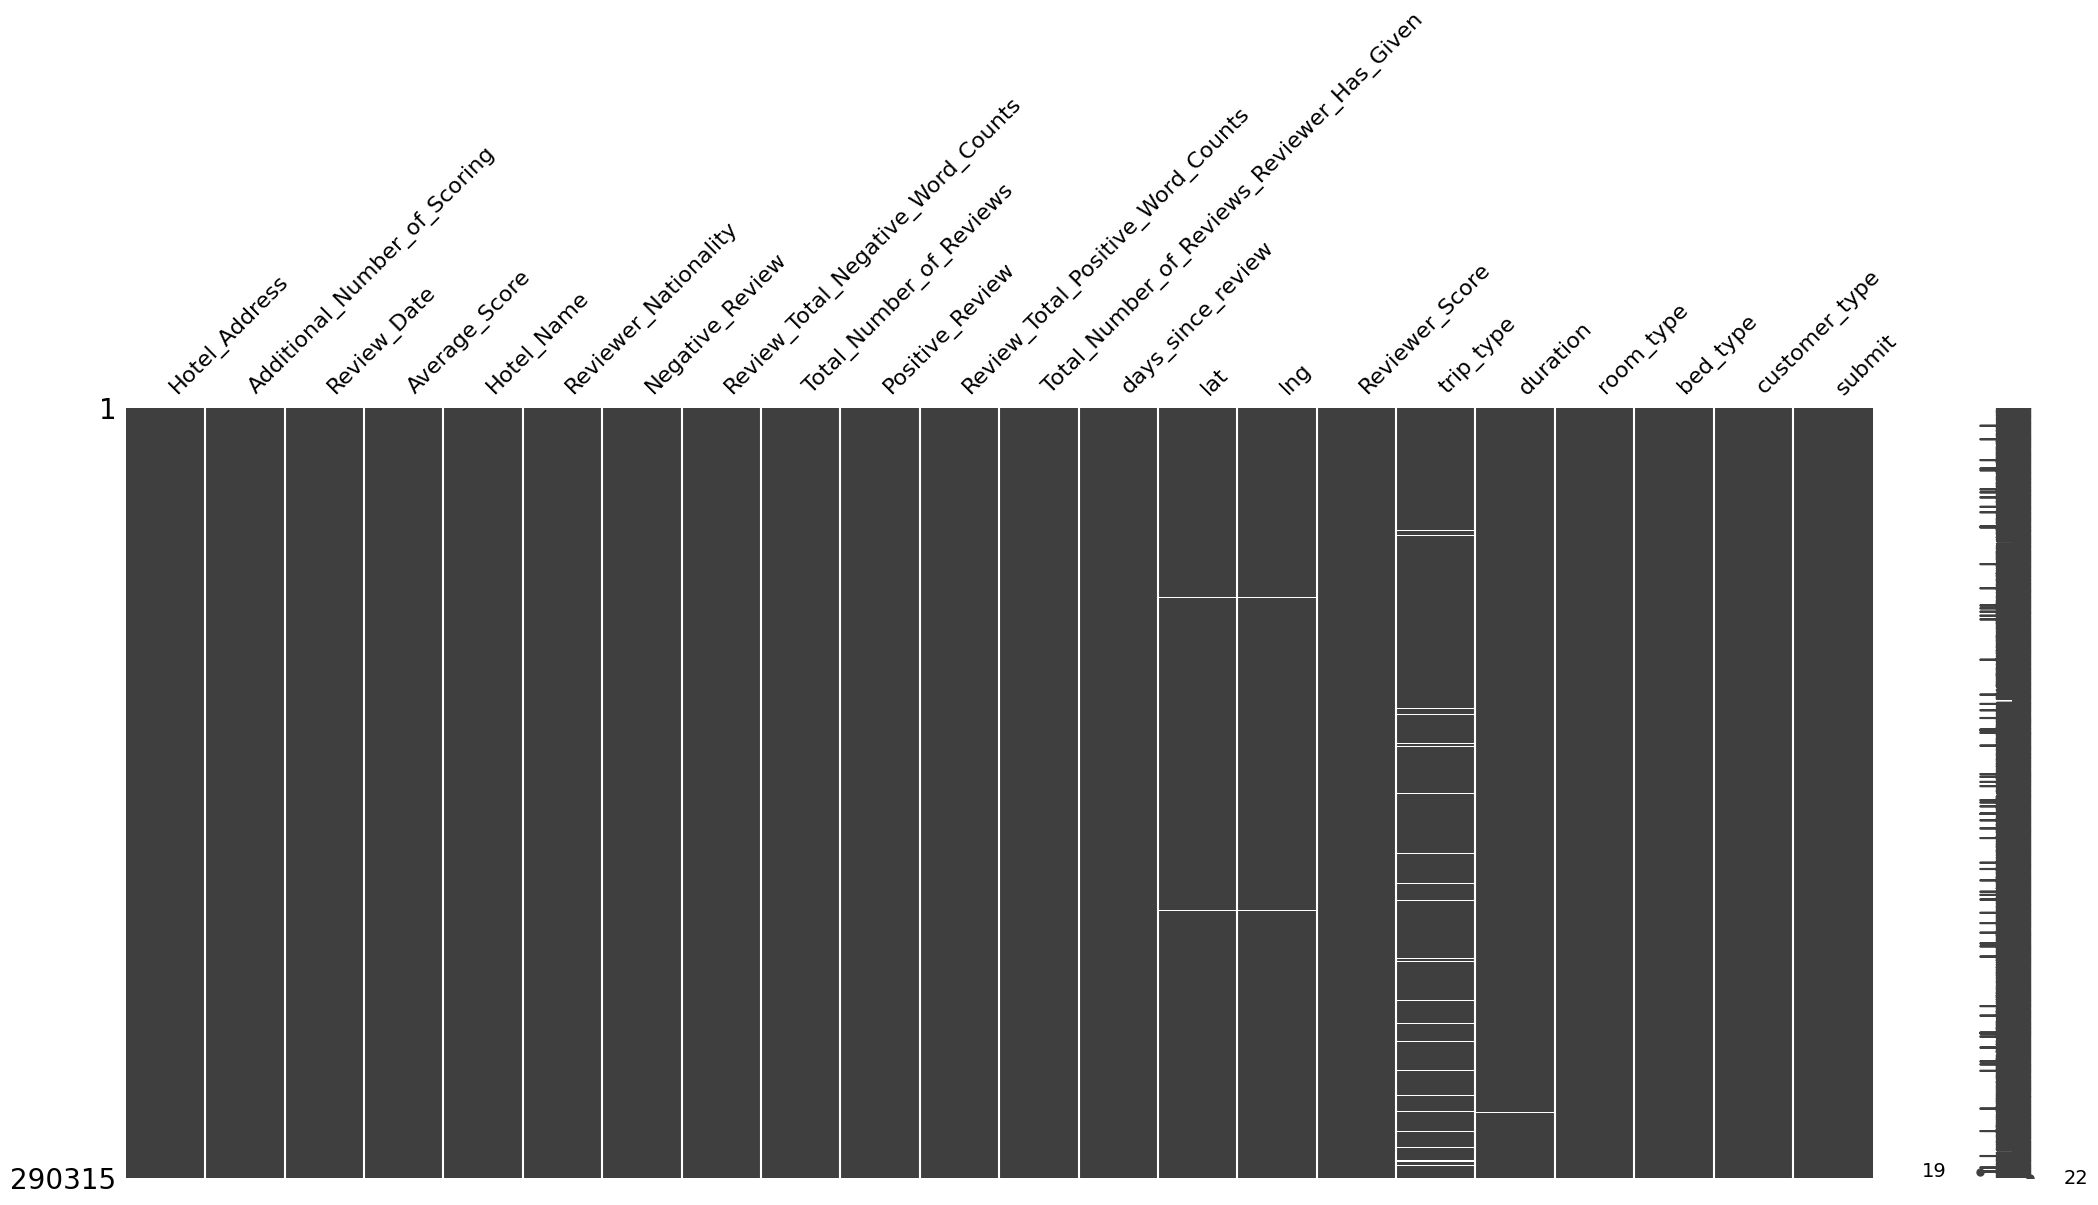

In [ ]:
import missingno as msno
msno.matrix(df)
# this show that the null values are mostly in the same rows

In [ ]:
print(df.info(),df.isnull().sum() ) # it contain Null valies in lat and lng #1824, trip_type 8449, and duration 109
df.isnull().mean()*100              # it outputs the percentage of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290315 entries, 0 to 290314
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               290315 non-null  object 
 1   Additional_Number_of_Scoring                290315 non-null  int64  
 2   Review_Date                                 290315 non-null  object 
 3   Average_Score                               290315 non-null  float64
 4   Hotel_Name                                  290315 non-null  object 
 5   Reviewer_Nationality                        290315 non-null  object 
 6   Negative_Review                             290315 non-null  object 
 7   Review_Total_Negative_Word_Counts           290315 non-null  int64  
 8   Total_Number_of_Reviews                     290315 non-null  int64  
 9   Positive_Review                             290315 non-null  object 
 

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
days_since_review                             0.000000
lat                                           0.628283
lng                                           0.628283
Reviewer_Score                                0.000000
trip_type                                     2.910287
duration                                      0.037545
room_type 

Text(53, 70000, 'Most Freq')

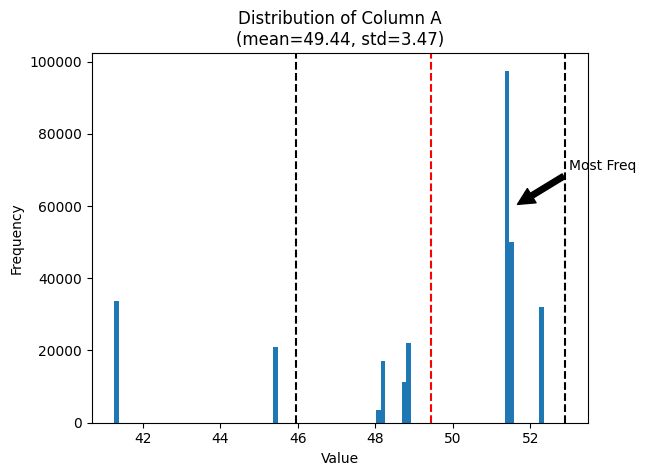

In [ ]:
mean = df['lat'].mean()
std = df['lat'].std()

#Save Data to compare distribution after filling
lat_old = df["lat"]

#Plot the distribution of the lat
plt.hist(df["lat"],bins=100, align='left')

# Line for the Mean
plt.axvline(mean, color='red', linestyle='dashed')

# Line of 1 STD from mean
plt.axvline(mean - std, color='black', linestyle='dashed')
plt.axvline(mean + std, color='black', linestyle='dashed')

# Label
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Column A\n(mean={:.2f}, std={:.2f})'.format(mean, std))

plt.annotate('Most Freq', xy=(51.6, 60000), xytext=(53, 70000),
            arrowprops=dict(facecolor='black', shrink=0.05))


Text(1.5, 95000, 'Most Freq')

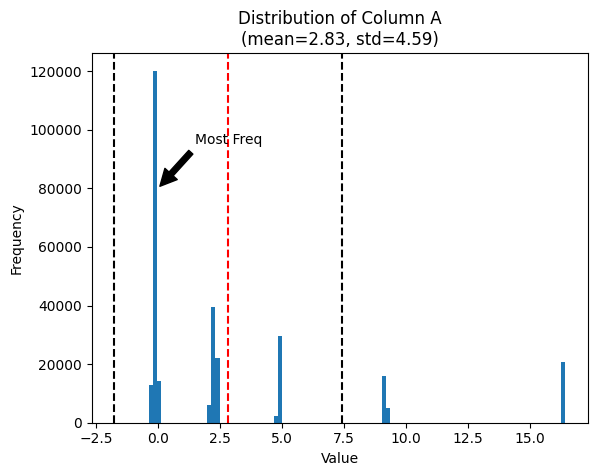

In [ ]:
mean = df['lng'].mean()
std = df['lng'].std()

#Save Data to compare distribution after filling
lng_old = df["lng"]


#Plot the distribution of the lng
plt.hist(df["lng"],bins=100)

# Line for the Mean
plt.axvline(mean, color='red', linestyle='dashed')

# Line of 1 STD from mean
plt.axvline(mean - std, color='black', linestyle='dashed')
plt.axvline(mean + std, color='black', linestyle='dashed')

# Label
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Column A\n(mean={:.2f}, std={:.2f})'.format(mean, std))

plt.annotate('Most Freq', xy=(0, 80000), xytext=(1.5, 95000),
            arrowprops=dict(facecolor='black', shrink=0.05))



Text(1.05, 0.8, 'The Graph shows \ncustomer usually comes \n for one day only \n and the amount decress \nfast  as we increase \nthe number of days')

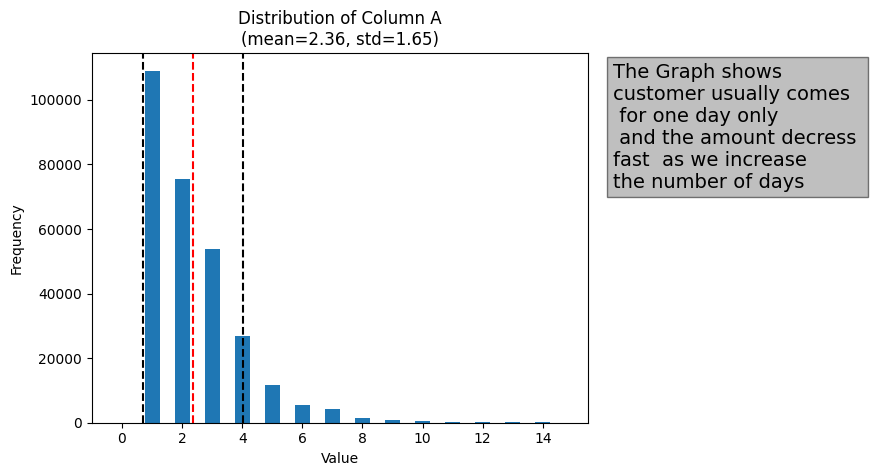

In [ ]:
mean = df['duration'].mean()
std = df['duration'].std()

#Save Data to compare distribution after filling
duration_old = df["duration"]


#Plot the distribution of the lng
plt.hist(df["duration"],range=(0,15),bins=30,align='left',)

# Line for the Mean
plt.axvline(mean, color='red', linestyle='dashed')

# Line of 1 STD from mean
plt.axvline(mean - std, color='black', linestyle='dashed')
plt.axvline(mean + std, color='black', linestyle='dashed')

# Label
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Column A\n(mean={:.2f}, std={:.2f})'.format(mean, std))

# Note
note = "The Graph shows \ncustomer usually comes \n for one day only \n and the amount decress \nfast  as we increase \nthe number of days"   # Just for fun
plt.gca().text(1.05, 0.8, note, transform=plt.gca().transAxes, fontsize=14,
                verticalalignment='center', bbox=dict(facecolor='gray', alpha=0.5))




array([ 0., nan,  1.])

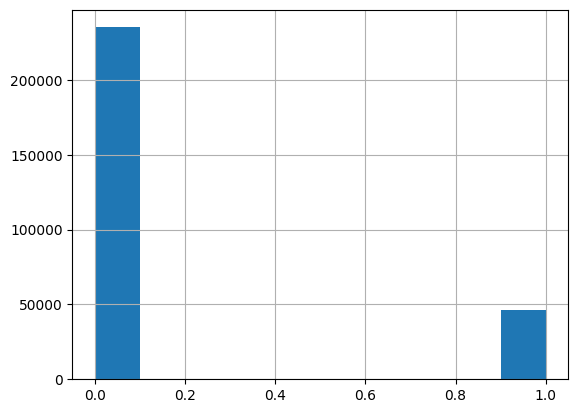

In [ ]:
mean = df['trip_type'].mean()
std = df['trip_type'].std()

#Save Data to compare distribution after filling
trip_type_old = df["trip_type"]


#Plot the distribution of the lng
df["trip_type"].hist()

df["trip_type"].unique()


In [ ]:
!pip install fancyimpute


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# I see the Knn filling is the best in this case as the data for the two columns are almost discrete. 
# so it is better to use the nearest points.




# using mean or median or mode

# lng_mean = df['lng'].mean()
# lng_median = df['lng'].median()
# lng_mode = df['lng'].mode().values[0]

# df['lng'].fillna(value=, inplace=True)







# using KNN is best used after having the data preprocessed, it takes almost a minute 
from sklearn.impute import KNNImputer
ln = df["lng"].isnull()
la = df["lat"].isnull()
du = df["duration"].isnull()
tr = df["trip_type"].isnull()
# sad = KNNImputer(n_neighbors=5).fit_transform(df[['lng']])
# df['lat'] = KNNImputer(n_neighbors=5).fit_transform(df[['lat']])
# df['duration'] = KNNImputer(n_neighbors=5).fit_transform(df[['duration']])
# df['trip_type'] = KNNImputer(n_neighbors=5).fit_transform(df[['trip_type']])



# using Mice

# !pip install fancyimpute
#import pandas as pd
#from fancyimpute import IterativeImputer
#
#imputer = IterativeImputer(max_iter=10, random_state=0)
#
#df['lng'] = imputer.fit_transform(df[['lng']])


from fancyimpute import IterativeImputer

# # Assume 'df' is a pandas DataFrame with missing values
cols_with_missing_values = ['lng', 'duration', 'lat','trip_type']
data_without_missing = df.drop(cols_with_missing_values, axis=1)
data_with_missing = df[cols_with_missing_values]

# Create an instance of the MICE imputer
imputer = IterativeImputer()

# Fit and transform the data
imputed_data = imputer.fit_transform(data_with_missing)

# Combine the imputed data with the non-missing data
df = pd.concat([data_without_missing, pd.DataFrame(imputed_data, columns=cols_with_missing_values)], axis=1)




In [ ]:
#duration values are int so we floor and ceil values under and above 2.5
t = df[du]
df["duration"].loc[t.index] = t["duration"].apply(lambda x: 2 if x < 2.5 else 3)

#Trip Type is either zero or one so same thing
tri = df[tr]
df["trip_type"].loc[tri.index] = tri["trip_type"].apply(lambda x : 0 if x < 0.5 else 1)



<ipython-input-33-026974e4a8b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration"].loc[t.index] = t["duration"].apply(lambda x: 2 if x < 2.5 else 3)
<ipython-input-33-026974e4a8b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trip_type"].loc[tri.index] = tri["trip_type"].apply(lambda x : 0 if x < 0.5 else 1)


Text(0.5, 1.0, 'trip_type')

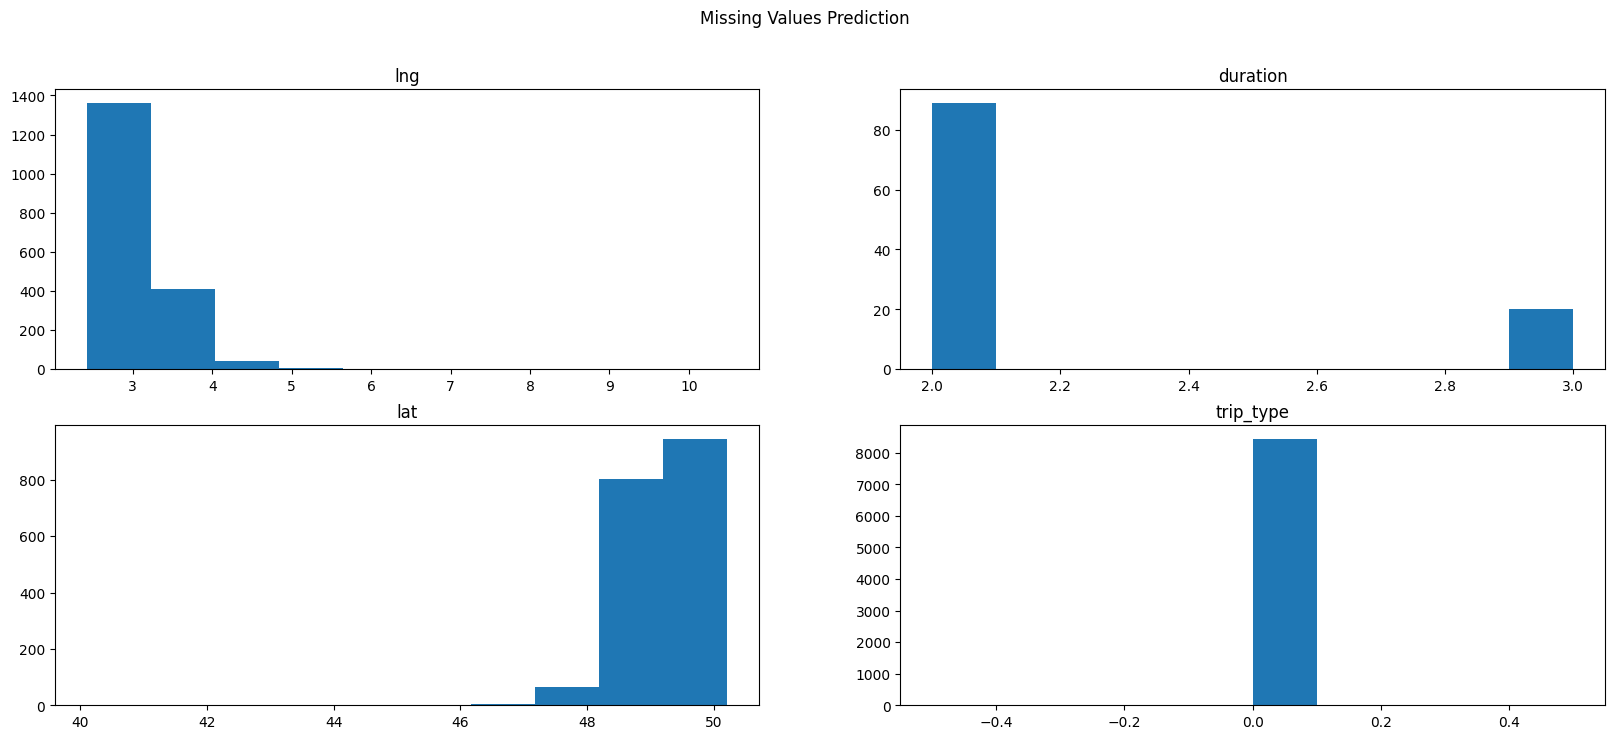

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))

fig.suptitle('Missing Values Prediction')

ax[0, 0].hist(df[ln]["lng"])
ax[1, 0].hist(df[la]["lat"])
ax[0, 1].hist(df[du]["duration"])
ax[1, 1].hist(df[tr]["trip_type"])

ax[0, 0].set_title('lng')
ax[1, 0].set_title('lat')
ax[0, 1].set_title('duration')
ax[1, 1].set_title('trip_type')

# # s.hist(df[la]["lat"],  ax=axes[1])
# # sns.kdeplot(df[du]["duration"],  ax=axes[2])
# # sns.kdeplot(df[tr]["trip_type"], ax=axes[3])


<ipython-input-35-8041051c7d8c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lat_old, shade=True, color='blue', ax=axes[0])
<ipython-input-35-8041051c7d8c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["lat"], shade=True, color='red', ax=axes[0])
<ipython-input-35-8041051c7d8c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lng_old, shade=True, color='blue', ax=axes[1])
<ipython-input-35-8041051c7d8c>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["lng"], shade=True, color='red', ax

<Axes: xlabel='trip_type', ylabel='Density'>

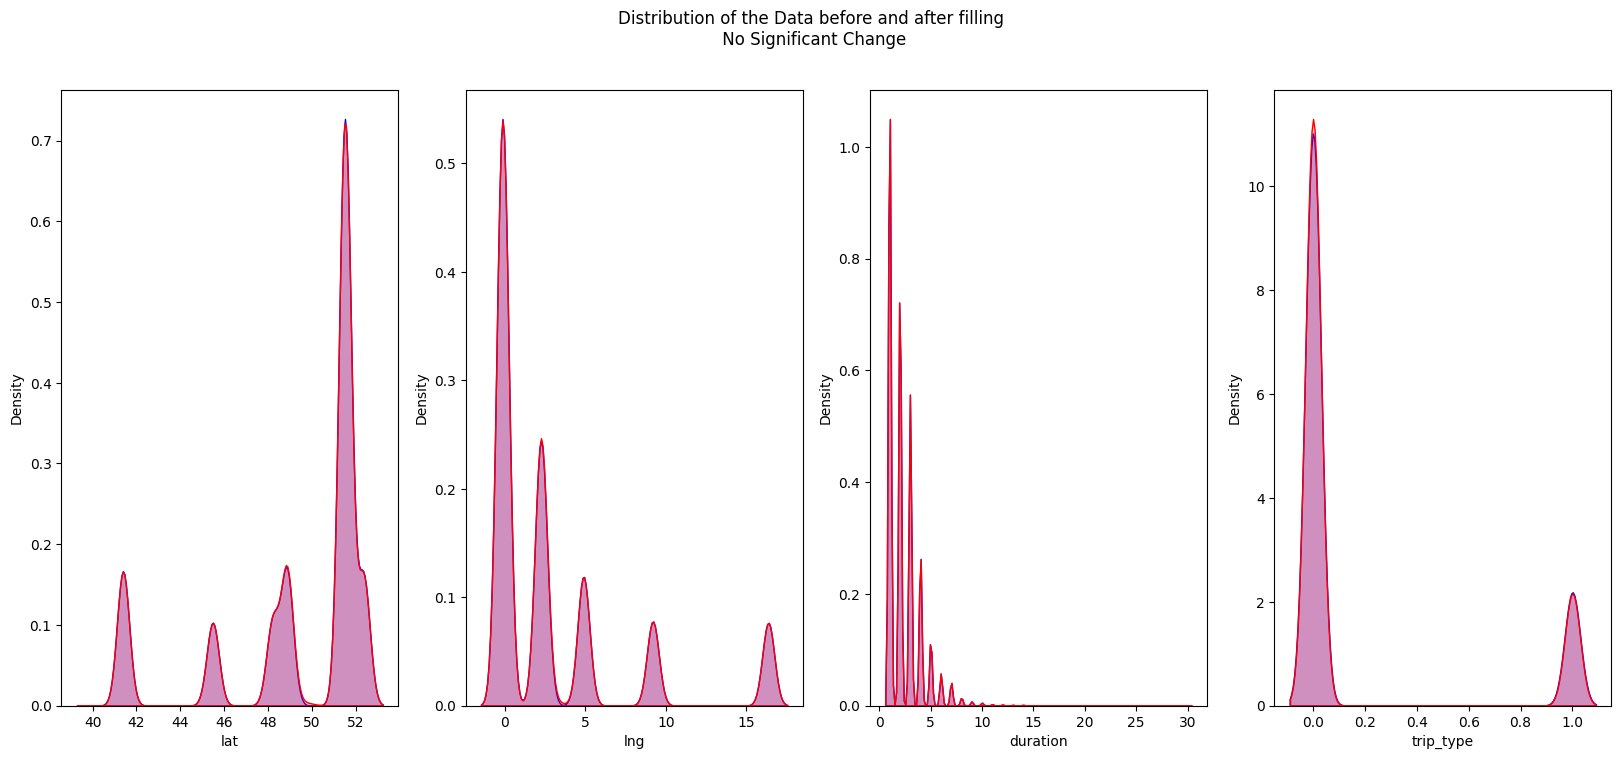

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,8))

fig.suptitle('Distribution of the Data before and after filling\n No Significant Change')

sns.kdeplot(lat_old, shade=True, color='blue', ax=axes[0])
sns.kdeplot(df["lat"], shade=True, color='red', ax=axes[0])

sns.kdeplot(lng_old, shade=True, color='blue', ax=axes[1])
sns.kdeplot(df["lng"], shade=True, color='red', ax=axes[1])

sns.kdeplot(duration_old, shade=True, color='blue', ax=axes[2])
sns.kdeplot(df["duration"], shade=True, color='red', ax=axes[2])

sns.kdeplot(trip_type_old, shade=True, color='blue', ax=axes[3])
sns.kdeplot(df["trip_type"], shade=True, color='red', ax=axes[3])



In [ ]:
df["trip_type"].apply(lambda x: int(x))
df["duration"].apply(lambda x: int(x))

0         6
1         3
2         1
3         1
4         4
         ..
290310    3
290311    1
290312    5
290313    3
290314    3
Name: duration, Length: 290315, dtype: int64

In [ ]:
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
days_since_review                             0
Reviewer_Score                                0
room_type                                     0
bed_type                                      0
customer_type                                 0
submit                                        0
lng                                           0
duration                                      0
lat                                     

# Feature Encoding


**Date** 

Converting Date into Months as 1 to 12 int values

In [ ]:
df["Month_of_Review"] = pd.to_datetime(df['Review_Date']).dt.month
df.drop("Review_Date",axis = 1, inplace = True)

<Axes: >

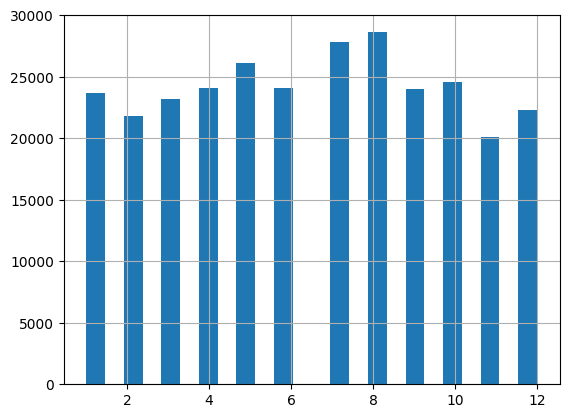

In [ ]:
df["Month_of_Review"].hist(bins = 24)

Drop Negative and Positive Reviews as it needs more advanced algorithms
We can search for words like finding how many amazing is said or somethin like that but its pointless i think
days since review is also useless as it won't effect the the rating

In [ ]:
df.drop(["Negative_Review","Positive_Review","days_since_review"],axis = 1,inplace = True)

Encoding:


1.   LabelEncoding/OrdinalEncoding 

    Used for Encoding ordered Data that have ordring meaning in it, like ages as an example
2.   Circular Encoding

    Circular encoding is a technique for encoding cyclical data, the data is represented as a point on a circle, then projected onto the X and Y axes to create two new numerical features.

3.   One hot Encoding


4.   Binary Encoding





**Months Circular Encoding**

<Axes: >

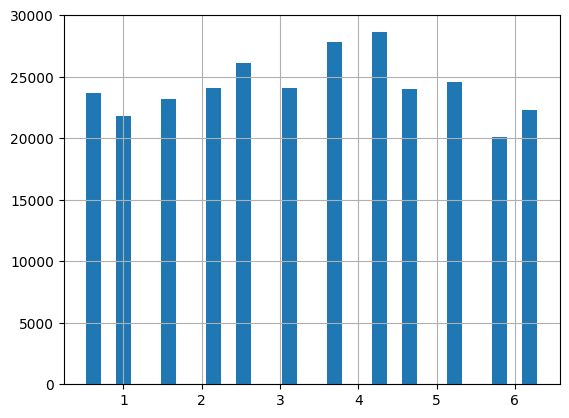

In [ ]:
df["Month_of_Review"] = 2 * math.pi * df["Month_of_Review"] / df["Month_of_Review"].max() # Normalize the data to be used in cos and sin
df["Month_of_Review"].hist(bins = 30)

The use of Sin and Cos togther is because it is perodic so some values might be the same, and normalizing it to only the first half will make it only normalized
as nothing will change in the data
Disadvantages:


1.   converting one information into two features
2.   Decision trees based algorithms build their split rules according to one feature at a time. This means that they will fail to process these two features simultaneously



In [ ]:
df["Month_cos"] = np.cos(df["Month_of_Review"])
df["Month_sin"] = np.sin(df["Month_of_Review"])
df.drop("Month_of_Review",axis =1 ,inplace = True)



---



---



**hotel address and Customer Type Encoding**
 
One Hot encoding Hotel address is it have only 5 unique values
nd 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

print(df['Hotel_Address'].unique(),df['customer_type'].unique())
df = pd.get_dummies(df, columns=['Hotel_Address'])
df = pd.get_dummies(df, columns=['customer_type'])

['United Kingdom' 'Milan Italy' 'Paris France' 'Barcelona Spain'
 'Amsterdam Netherlands' 'Vienna Austria'] [' Family with young children ' ' Group ' ' Couple '
 ' Family with older children ' ' Solo traveler '
 ' Travelers with friends ']




---



---



**Reviewer Nationality Encoding**

Using Binary Encoding to encode nationality as there is huge number of them and there is no order.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Reviewer_Nationality'])
df = encoder.fit_transform(df)



---



---



**Bed Type Encoding**

Mapping Bed Types as ordinal labeling because they can be ordered by sizes and the sizes from the smallest to largest are


Unknown Single Twin Double Triple Quadruple Queen King, the only problem that can happen is that unknown values are clustered to single value, this might be a mistake but we be tested


In [ ]:
# mapping = {'Unknown':0,'Single': 1, 'Twin': 2, 'Double': 3, 'Triple': 4, 'Quadruple': 5, 'Queen':6,'King':7,}

le = LabelEncoder()
le.fit(df["bed_type"])

df["bed_type"] = le.transform(df["bed_type"])
df["bed_type"]

0         0
1         6
2         0
3         0
4         0
         ..
290310    0
290311    0
290312    0
290313    1
290314    0
Name: bed_type, Length: 290315, dtype: int64

I Couldn't set the mapping myself so it encoded it then rearranged the output

In [ ]:
# 3 7 5 6 1 4 2 0
print(le.classes_)
def fun(x):
  if x == 0:
    return 3
  elif x == 1:
    return 7
  elif x == 2:
    return 5
  elif x == 3:
    return 6
  elif x == 4:
    return 1
  elif x == 5:
    return 4
  elif x == 6:
    return 2
  else:
    return 0

df["bed_type"] = df["bed_type"].apply(fun)
df["bed_type"].head(30)

['Double' 'King' 'Quadruple' 'Queen' 'Single' 'Triple' 'Twin' 'Unknown']


0     3
1     2
2     3
3     3
4     3
5     3
6     0
7     3
8     6
9     2
10    3
11    3
12    3
13    1
14    3
15    3
16    2
17    2
18    4
19    3
20    3
21    3
22    3
23    3
24    2
25    3
26    0
27    2
28    2
29    3
Name: bed_type, dtype: int64



---



---



**Room Type and Hotel Name Encoding**

there a 17 different types of room in the dataset, and there is difference between each one of them and it should be ordered but the problem is that there is no standard knowledge that i found for them so i will binary encode them

and the hotel name have 1492 unique vales so the same labeling

In [ ]:
encoder = ce.BinaryEncoder(cols=['room_type','Hotel_Name'])
df = encoder.fit_transform(df)

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
df.head(20),df.columns

(    Additional_Number_of_Scoring  Average_Score  Hotel_Name_0  Hotel_Name_1  \
 0                            806            7.8             0             0   
 1                            908            8.5             0             0   
 2                            904            8.1             0             0   
 3                            230            8.6             0             0   
 4                            241            7.5             0             0   
 5                            541            7.9             0             0   
 6                            417            8.9             0             0   
 7                             95            9.1             0             0   
 8                            240            9.2             0             0   
 9                            639            8.8             0             0   
 10                           908            8.5             0             0   
 11                           197       

# Normalization

there will be only specific columns that will be normalized beacause encoded data shouldn't be normalized

In [ ]:
t = ['Additional_Number_of_Scoring', 'Average_Score',  'Review_Total_Negative_Word_Counts',
        'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
        'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
         'lng', 'lat'   
      ]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
y = df["Reviewer_Score"]
X = df.drop("Reviewer_Score",axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will only normalize the features

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Training Mdels

Randomly picking models and training Them

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


models = [
    LinearRegression(),
    Ridge(),      # Linear with L2
    Lasso(),      # Linear with L1

    DecisionTreeRegressor(),
    # RandomForestRegressor(),
    # SVR(),
    # GradientBoostingRegressor()

]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse:.4f}")


LinearRegression MSE: 1.8159
Ridge MSE: 1.8159
Lasso MSE: 2.6434
DecisionTreeRegressor MSE: 3.2199


Analyzing the Score for each one

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

for i in range(2,6):
  poly = PolynomialFeatures(degree=i)
  X_poly = poly.fit_transform(X_train)

  model = LinearRegression()
  model.fit(X_poly, y_train)

  X_test_poly = poly.transform(X_test)

  # Predict using the model
  y_pred = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_pred)
  print(f"{i}  {model.__class__.__name__} MSE: {mse:.4f}")


2  LinearRegression MSE: 1.6659


Best till now 

GradientBoostingRegressor MSE: 1.4966

In [ ]:
#LinearRegression MSE: 1.8159
# Ridge MSE: 1.8159
# Lasso MSE: 2.6434
# DecisionTreeRegressor MSE: 3.2220
# GradientBoostingRegressor MSE: 1.4966

Problem:


1.   Additional_Number_of_Scoring what is the meaning of this feature, and it is dependent of the hotel
2.   Setting the unknown values in bed and customer and room type to new category
3.   not sure about normalizing ordianl or non ordinal data


**References** 

[Missing Data Article](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87#:~:text=One%20way%20to%20impute%20missing,with%20the%20previously%20observed%20value.)


[Categorical Data Encoding Schemes](https://medium.com/analytics-vidhya/types-of-categorical-data-encoding-schemes-a5bbeb4ba02b)

[Categorical Variable Encoding Extra resource](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)


[Cyclical features encoding](https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca)


[Bed sizes Article for domain knowledge](https://www.usnews.com/360-reviews/sleep/mattress/mattress-sizes)
I assumed search for Double and Triple and saw that they are smaller than queen and king but Quadruple i didnt see any match for it

[Normalization Target Variable](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)
